<a href="https://colab.research.google.com/github/Sowmya-2348562/Deep-Learning/blob/main/2348562_DL_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LSTM
# Importing dataset

import pandas as pd
dataset_train = pd.read_csv("C:\\Users\\Sowmya C\\Downloads\\Google_Stock_Price_Train.csv")
dataset_test = pd.read_csv("C:\\Users\\Sowmya C\\Downloads\\Google_Stock_Price_Test.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"




1. LSTM is a type of neural network designed to handle sequences of data, like time series or language.

2. It is capable of learning and remembering long-term dependencies within the data.

3. This is achieved through a system of gates that control the flow of information, enabling the network to retain or forget information as necessary.

4. LSTM networks are useful for tasks like language translation, speech recognition, and time series forecasting.  

In [ ]:
# Normalising data

from sklearn.preprocessing import MinMaxScaler
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating training sets

import numpy as np
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Building the LSTM model

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input
model=Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1499 - mean_absolute_error: 0.2903
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0080 - mean_absolute_error: 0.0707
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0045 - mean_absolute_error: 0.0516
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0520
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0040 - mean_absolute_error: 0.0468
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0033 - mean_absolute_error: 0.0414
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0036 - mean_absolute_error: 0.0426
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030 - mean_absolute_error: 0.0404
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0031 - mean_absolute_error: 0.0410
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026 - mean_absolute_error: 0.0367
Epoch 11/100
38/38 ━━━━━━━━━━

In [ ]:
# Predicting price

real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


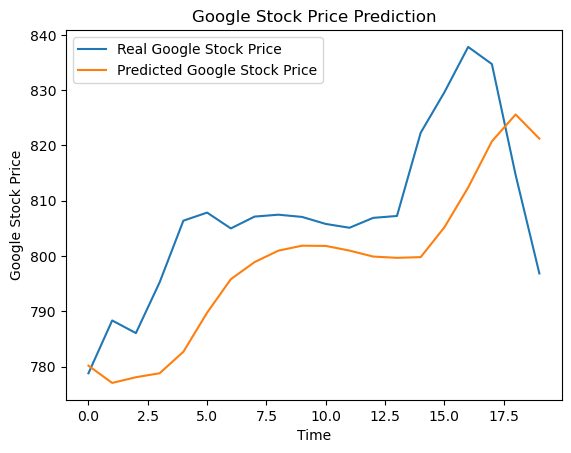

In [ ]:
# Displaying Prediction

import matplotlib.pyplot as plt
plt.plot(real_stock_price, label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()